In [7]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

from lightning.pytorch.loggers import TensorBoardLogger

In [3]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.16.2


Reference from [Ben Chuanlong Du's Blog](https://www.legendu.net/en/blog/read-tensorboard-logs/)

In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd

## Charts - Federated with 5 clients

### Generating the pandas dataframes

In [25]:
temp_auc_fed = pd.DataFrame()

for index in range(44):
    acc = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_5c/version_{index}'
    )
    acc.Reload()
    print(index)
    if(index not in [21, 23, 29, 33, 34]):
        a = pd.DataFrame(acc.Scalars("test_auc_roc"))
        a['version'] = index
        temp_auc_fed = pd.concat([temp_auc_fed, a])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [26]:
temp_avg_prec_fed = pd.DataFrame()

for index in range(44):
    acc2 = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_5c/version_{index}'
    )
    acc2.Reload()
    print(index)
    if(index not in [21, 23, 29, 33, 34]):
        b = pd.DataFrame(acc2.Scalars("test_avg_precision"))
        b['version'] = index
        temp_avg_prec_fed = pd.concat([temp_avg_prec_fed, b])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [27]:
temp_loss_fed = pd.DataFrame()

for index in range(44):
    acc3 = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_5c/version_{index}'
    )
    acc3.Reload()
    print(index)
    if(index not in [21, 23, 29, 33, 34]):
        c = pd.DataFrame(acc3.Scalars("test_loss"))
        c['version'] = index
        temp_loss_fed = pd.concat([temp_loss_fed, c])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


In [28]:
temp_auc_fed

,wall_time,step,value,version
0,1.712412e+09,0,0.596543,0
0,1.712412e+09,0,0.508669,1
0,1.712412e+09,0,0.494705,2
1,1.712412e+09,0,0.517512,2
2,1.712412e+09,0,0.495359,2
...,...,...,...,...
0,1.712523e+09,0,0.547653,42
1,1.712523e+09,0,0.547949,42
0,1.712523e+09,0,0.514041,43
1,1.712523e+09,0,0.514779,43


In [29]:
temp_avg_prec_fed

,wall_time,step,value,version
0,1.712412e+09,0,0.105341,0
0,1.712412e+09,0,0.026803,1
0,1.712412e+09,0,0.030062,2
1,1.712412e+09,0,0.048046,2
2,1.712412e+09,0,0.030068,2
...,...,...,...,...
0,1.712523e+09,0,0.031810,42
1,1.712523e+09,0,0.031775,42
0,1.712523e+09,0,0.027325,43
1,1.712523e+09,0,0.027293,43


In [30]:
temp_loss_fed

,wall_time,step,value,version
0,1.712412e+09,0,0.463661,0
1,1.712412e+09,0,0.494518,0
2,1.712412e+09,0,0.479185,0
3,1.712412e+09,0,0.499602,0
4,1.712412e+09,0,0.545424,0
...,...,...,...,...
658,1.712524e+09,0,0.609976,43
659,1.712524e+09,0,0.613700,43
660,1.712524e+09,0,0.615513,43
661,1.712524e+09,0,0.756192,43


### AUC ROC Score Graph - Fed

Text(0, 0.5, 'Frequency')

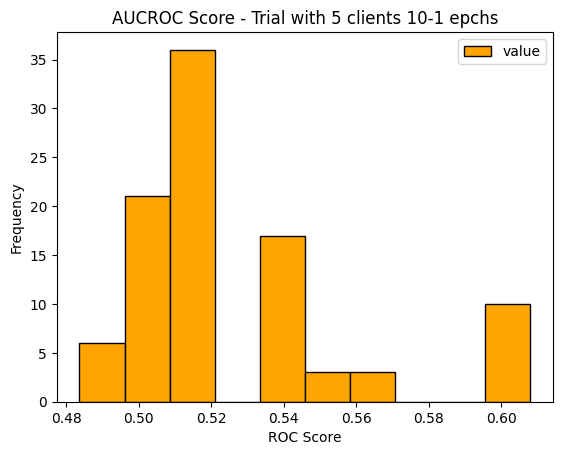

In [31]:
ax1 = temp_auc_fed.plot.hist(column='value', edgecolor='black', color='orange')

ax1.set_title('AUCROC Score - Trial with 5 clients 10-1 epchs')
ax1.set_xlabel("ROC Score")
ax1.set_ylabel("Frequency")

In [32]:
fig1 = ax1.get_figure()
fig1.savefig('auc_roc_score_fed.pdf', format = 'pdf')

### Average Precision Score Graph - Fed

Text(0, 0.5, 'Frequency')

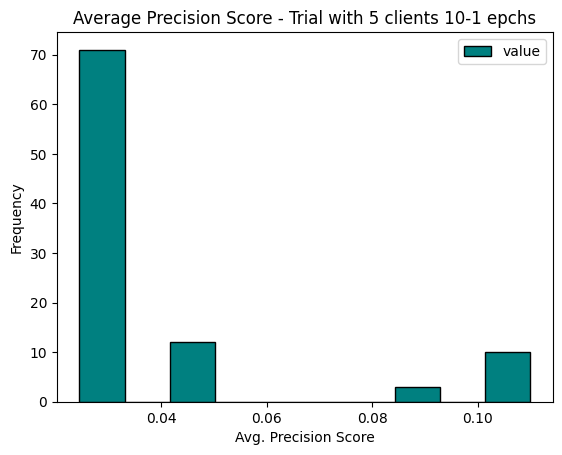

In [33]:
ax2 = temp_avg_prec_fed.plot.hist(column='value', edgecolor='black', color='teal')

ax2.set_title('Average Precision Score - Trial with 5 clients 10-1 epchs')
ax2.set_xlabel("Avg. Precision Score")
ax2.set_ylabel("Frequency")

In [34]:
fig2 = ax2.get_figure()
fig2.savefig('avg_prec_fed.pdf', format = 'pdf')

### MSE Loss Graph - Fed

Text(0, 0.5, 'Frequency')

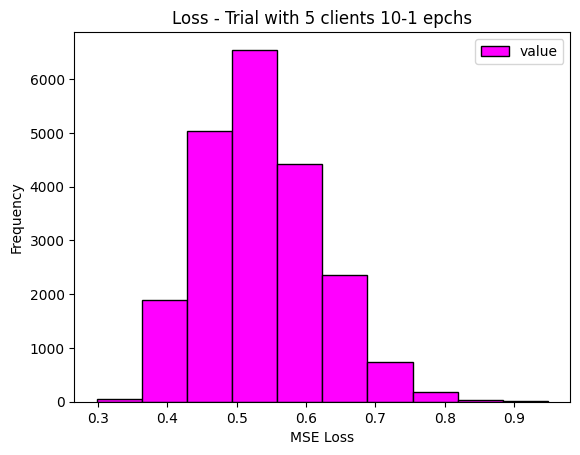

In [35]:
ax3 = temp_loss_fed.plot.hist(column='value', bins=10, edgecolor='black', color='magenta')

ax3.set_title('Loss - Trial with 5 clients 10-1 epchs')
ax3.set_xlabel("MSE Loss")
ax3.set_ylabel("Frequency")

In [36]:
fig3 = ax3.get_figure()
fig3.savefig('mse_loss_fed.pdf', format = 'pdf')

## Charts - Centralized

In [3]:
index=0
acc = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_centralized/version_{index}'
    )
acc.Reload()

In [4]:
acc.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['train_loss_step',
  'train_BCE_loss',
  'epoch',
  'test_loss',
  'test_auc_roc',
  'test_avg_precision'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

### Generate the Dataframes

In [37]:
temp_auc_central = pd.DataFrame()

for index in range(30):
    acc4 = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_centralized/version_{index}'
    )
    acc4.Reload()
    print(index)
    a1 = pd.DataFrame(acc4.Scalars("test_auc_roc"))
    a1['version'] = index
    temp_auc_central = pd.concat([temp_auc_central, a1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [38]:
temp_avg_prec_central = pd.DataFrame()

for index in range(30):
    acc5 = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_centralized/version_{index}'
    )
    acc5.Reload()
    b1 = pd.DataFrame(acc5.Scalars("test_avg_precision"))
    b1['version'] = index
    temp_avg_prec_central = pd.concat([temp_avg_prec_central, b1])

In [39]:
temp_loss_central = pd.DataFrame()

for index in range(30):
    acc6 = EventAccumulator(
        f'/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/trial_centralized/version_{index}'
    )
    acc6.Reload()
    c1 = pd.DataFrame(acc6.Scalars("test_loss"))
    c1['version'] = index
    temp_loss_central = pd.concat([temp_loss_central, c1])

### AUC ROC Graph

Text(0, 0.5, 'Frequency')

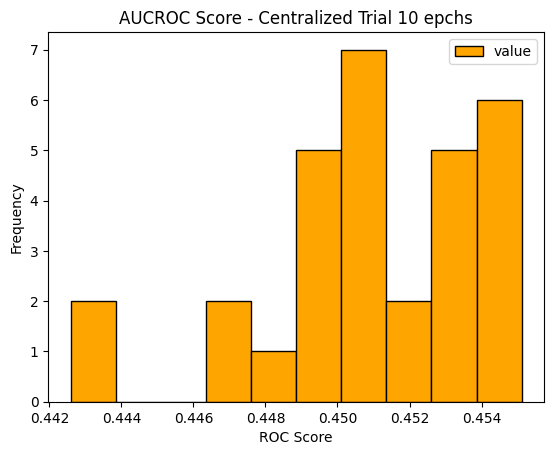

In [40]:
ax4 = temp_auc_central.plot.hist(column='value', edgecolor='black', color='orange')

ax4.set_title('AUCROC Score - Centralized Trial 10 epchs')
ax4.set_xlabel("ROC Score")
ax4.set_ylabel("Frequency")

In [41]:
fig4 = ax4.get_figure()
fig4.savefig('auc_score_central.pdf', format = 'pdf')

### Average Precision Graph

Text(0, 0.5, 'Frequency')

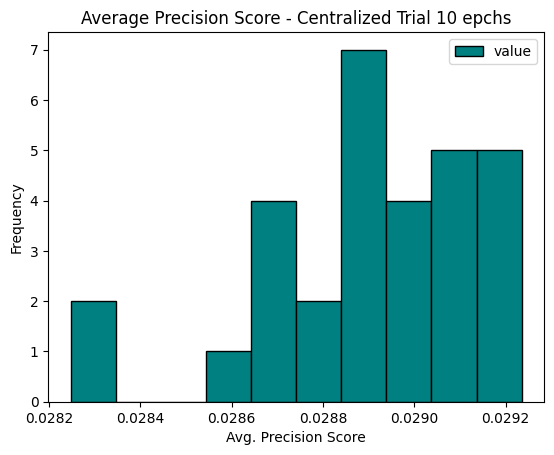

In [42]:
ax5 = temp_avg_prec_central.plot.hist(column='value', edgecolor='black', color='teal')

ax5.set_title('Average Precision Score - Centralized Trial 10 epchs')
ax5.set_xlabel("Avg. Precision Score")
ax5.set_ylabel("Frequency")

In [43]:
fig5 = ax5.get_figure()
fig5.savefig('avg_prec_central.pdf', format = 'pdf')

### MSE Loss Graph

Text(0, 0.5, 'Frequency')

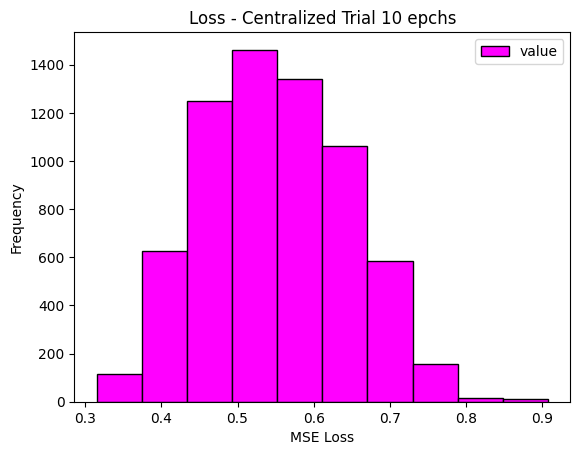

In [44]:
ax6 = temp_loss_central.plot.hist(column='value', bins=10, edgecolor='black', color='magenta')

ax6.set_title('Loss - Centralized Trial 10 epchs')
ax6.set_xlabel("MSE Loss")
ax6.set_ylabel("Frequency")

In [45]:
fig6 = ax6.get_figure()
fig6.savefig('loss_central.pdf', format = 'pdf')

## General Tests

In [17]:
acc = EventAccumulator(
    '/home/labnet/Documents/JulianaPiaz/quickstart-pytorch-lightning/tb_logs/test_no_shuffle/version_0'
)

In [18]:
acc.Reload()

In [19]:
acc.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['train_loss_step', 'train_BCE_loss', 'epoch'],
 'distributions': [],
 'tensors': [],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [20]:
temp = pd.DataFrame(acc.Scalars("train_BCE_loss"))

<Axes: >

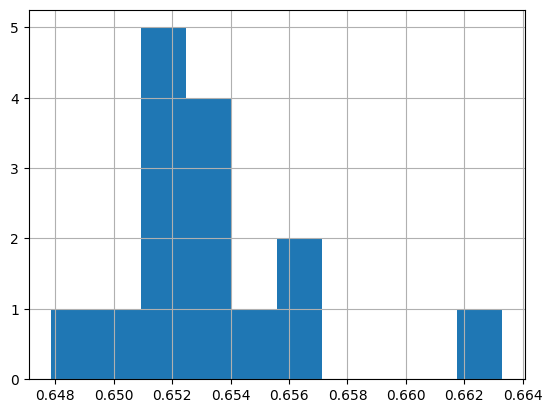

In [21]:
temp['value'].hist()

Text(0, 0.5, 'Version')

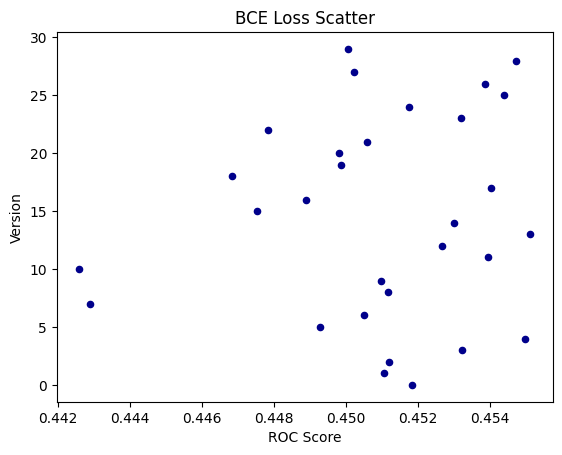

In [23]:
ax = temp_auc.plot.scatter(y='version', x='value', c='DarkBlue')
# lw=2, colormap='jet', marker='.', markersize=10, 
ax.set_title('BCE Loss Scatter')
ax.set_xlabel("ROC Score")
ax.set_ylabel("Version")